In [179]:
# ID Unique transaction ID
# DOMAIN_ID Unique ID for the web domain
# MACHINE_ID Unique ID for the computer (household) on which the transaction was made
# SITE_SESSION_ID Unique ID for the session in which the transaction was made
# TRANS_FREQ Total number of transactions for the household during 2011.
# DOMAIN_NAME The website (domain) name where the transaction was made
# DIRECTP_D A dummy variable indicating whether the transaction is incurred directly from a hotel website (1) or other third_party travel website (0).
# PROD_NAME The product (e.g., hotel or packages) purchased by the household
# PROD_QTY The number of products purchased in this transaction
# PROD_TOTPRICE Total price paid for this transaction
# REF_DOMAIN_NAME The referring website (domain) name through which the final purchase website was reached
# DURATION Total time spent at a site (mins)
# PAGES_VIEWED Total pages viewed at a site
# HOUSEHOLD_SIZE Total number of people in the household
# CHILDREN_D A dummy variable indicating whether the household has any children (1) or not (0).
# CONNECTIONSPEED_D A dummy variable indicating whether the household has high speed internet connection (1) or not (0)

In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [181]:
hotel = pd.read_excel('HotelClickStream-1.xls')

In [182]:
hotel.head(3)

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,NaN,23.328125,13,6,1,1
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1


In [183]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3749 non-null   int64  
 1   DOMAIN_ID          3749 non-null   uint64 
 2   MACHINE_ID         3749 non-null   int64  
 3   SITE_SESSION_ID    3749 non-null   int64  
 4   TRANS_FREQ         3749 non-null   int64  
 5   DOMAIN_NAME        3749 non-null   object 
 6   DIRECTP_D          3749 non-null   int64  
 7   PROD_NAME          3749 non-null   object 
 8   PROD_QTY           3749 non-null   int64  
 9   PROD_TOTPRICE      3749 non-null   float64
 10  REF_DOMAIN_NAME    1687 non-null   object 
 11  DURATION           3749 non-null   float64
 12  PAGES_VIEWED       3749 non-null   int64  
 13  HOUSEHOLD_SIZE     3749 non-null   int64  
 14  CHILDREN_D         3749 non-null   int64  
 15  CONNECTIONSPEED_D  3749 non-null   int64  
dtypes: float64(2), int64(10)

In [184]:
#top 10 domain names that generated the most volume of transactions
p1 = hotel.groupby('DOMAIN_NAME')["ID"].count().nlargest(10)
# p1 = pd.pivot_table( hotel, 
#                   index=["DOMAIN_NAME"], 
#                   values = 'ID',
#                     aggfunc=['count'] )
print(p1)

DOMAIN_NAME
marriott.com        524
hilton.com          438
hotels.com          400
expedia.com         380
priceline.com       309
choicehotels.com    297
jetblue.com         229
hotwire.com         217
bestwestern.com     120
orbitz.com          109
Name: ID, dtype: int64


In [185]:
#the top 10 reference domain names that generated the most volume of transactions
hotel.groupby('REF_DOMAIN_NAME')["ID"].count().nlargest(10)

REF_DOMAIN_NAME
google.com           620
yahoo.com            222
bing.com             129
aol.com               53
comfortinn.com        48
jetblue.com           43
qualityinn.com        29
comfortsuites.com     22
kayak.com             20
mywebsearch.com       17
Name: ID, dtype: int64

In [186]:
hotel.loc[hotel.REF_DOMAIN_NAME.isnull() == True,'Ref_D'] = 0
hotel.loc[hotel.REF_DOMAIN_NAME.isnull() == False,'Ref_D'] = 1

In [187]:
hotel['Ref_D'].head(10)

0    0.0
1    1.0
2    1.0
3    0.0
4    1.0
5    1.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: Ref_D, dtype: float64

In [188]:
hotel.columns
hotel.head(3)

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,Ref_D
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,NaN,23.328125,13,6,1,1,0.0
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1,1.0
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1,1.0


In [189]:
#np.log(hotel['PROD_TOTPRICE'])
hotel["PROD_TOTPRICE"] = hotel["PROD_TOTPRICE"] + 1
hotel.loc[hotel.PROD_TOTPRICE > 0,'LOG_PRICE'] = np.log(hotel['PROD_TOTPRICE'])
#hotel.loc[hotel.PROD_TOTPRICE <= 0,'LOG_PRICE'] = 'NaN'


In [190]:
hotel.head(5)

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,Ref_D,LOG_PRICE
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2848.039993,NaN,23.328125,13,6,1,1,0.0,7.954386
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2407.939995,yahoo.com,47.109375,17,2,1,1,1.0,7.786527
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2169.000000,google.com,20.058594,19,1,0,1,1.0,7.682022
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1959.699997,NaN,47.546875,39,1,0,1,0.0,7.580547
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1798.000000,whotels.com,14.599609,19,1,0,1,1.0,7.494430


In [191]:
hotel.describe()

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DIRECTP_D,PROD_QTY,PROD_TOTPRICE,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,Ref_D,LOG_PRICE
count,3749.000000,3.749000e+03,3.749000e+03,3.749000e+03,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,1877.293678,8.436032e+18,8.615370e+07,1.976820e+13,2.981328,0.481462,1.717258,164.859624,25.317508,18.331288,3.273940,0.603894,0.992265,0.449987,4.439926
std,1083.651205,4.548078e+18,6.798597e+06,2.750259e+13,4.120927,0.499723,1.387385,184.484515,22.806497,16.636523,4.388536,0.489152,0.087622,0.497559,1.615478
min,1.000000,8.614049e+17,1.764018e+07,3.170357e+12,1.000000,0.000000,0.000000,1.000000,0.029999,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,939.000000,5.078454e+18,8.197324e+07,4.404378e+12,1.000000,0.000000,1.000000,72.950000,9.449219,8.000000,2.000000,0.000000,1.000000,0.000000,4.289774
50%,1878.000000,7.317461e+18,8.698025e+07,5.037588e+12,2.000000,0.000000,1.000000,116.990000,17.777344,13.000000,3.000000,1.000000,1.000000,0.000000,4.762088
75%,2815.000000,9.530953e+18,9.165384e+07,6.535772e+12,3.000000,1.000000,2.000000,200.980000,33.656250,23.000000,4.000000,1.000000,1.000000,1.000000,5.303205
max,3753.000000,1.747520e+19,9.532007e+07,7.441268e+13,30.000000,1.000000,32.000000,2848.039993,227.343750,141.000000,99.000000,1.000000,1.000000,1.000000,7.954386


In [192]:
hotel.LOG_PRICE.describe()

count    3749.000000
mean        4.439926
std         1.615478
min         0.000000
25%         4.289774
50%         4.762088
75%         5.303205
max         7.954386
Name: LOG_PRICE, dtype: float64

<AxesSubplot:>

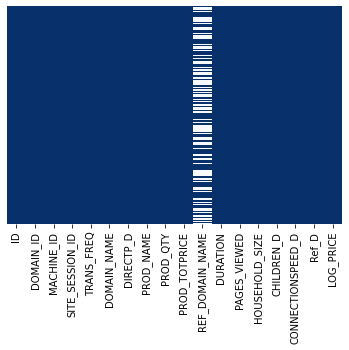

In [193]:
sns.heatmap(hotel.isna(),yticklabels=False,cbar=False,cmap="Blues_r")
#plt.savefig('na.png')

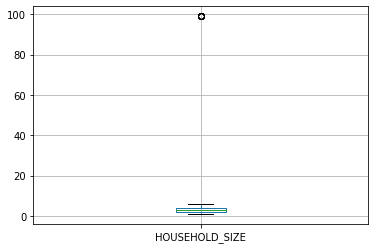

In [194]:
boxplot_ad = hotel.boxplot(column=['HOUSEHOLD_SIZE'])  
#outliers?
#plt.savefig('box1.png')

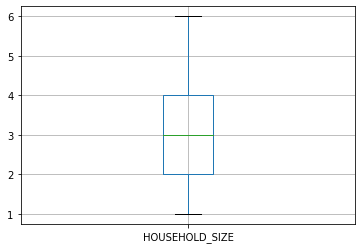

In [195]:
upper_limit = hotel['HOUSEHOLD_SIZE'].quantile(0.99)
lower_limit = hotel['HOUSEHOLD_SIZE'].quantile(0.01)

new_hotel = hotel[(hotel['HOUSEHOLD_SIZE'] <= upper_limit) & (hotel['HOUSEHOLD_SIZE'] >= lower_limit)]


boxplot_ad = new_hotel.boxplot(column=['HOUSEHOLD_SIZE'])  
#plt.savefig('box2.png')

In [196]:
#(hotel['PROD_TOTPRICE'] == 0).sum()

In [197]:
(new_hotel['PROD_TOTPRICE']).count()

3742

In [198]:
(new_hotel).count()

ID                   3742
DOMAIN_ID            3742
MACHINE_ID           3742
SITE_SESSION_ID      3742
TRANS_FREQ           3742
DOMAIN_NAME          3742
DIRECTP_D            3742
PROD_NAME            3742
PROD_QTY             3742
PROD_TOTPRICE        3742
REF_DOMAIN_NAME      1684
DURATION             3742
PAGES_VIEWED         3742
HOUSEHOLD_SIZE       3742
CHILDREN_D           3742
CONNECTIONSPEED_D    3742
Ref_D                3742
LOG_PRICE            3742
dtype: int64

In [199]:
new_hotel.describe()

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DIRECTP_D,PROD_QTY,PROD_TOTPRICE,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,Ref_D,LOG_PRICE
count,3742.000000,3.742000e+03,3.742000e+03,3.742000e+03,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000
mean,1875.715927,8.435314e+18,8.614598e+07,1.974250e+13,2.982897,0.481828,1.716996,164.805377,25.337767,18.341261,3.094869,0.603153,0.992250,0.450027,4.438632
std,1083.064908,4.548712e+18,6.797291e+06,2.748601e+13,4.124464,0.499736,1.387432,184.604758,22.819644,16.649645,1.454957,0.489309,0.087703,0.497563,1.616545
min,1.000000,8.614049e+17,1.764018e+07,3.170357e+12,1.000000,0.000000,0.000000,1.000000,0.029999,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,938.250000,5.078454e+18,8.197324e+07,4.403941e+12,1.000000,0.000000,1.000000,72.792500,9.449219,8.000000,2.000000,0.000000,1.000000,0.000000,4.287612
50%,1875.500000,7.317461e+18,8.698025e+07,5.036265e+12,2.000000,0.000000,1.000000,116.970000,17.802734,13.000000,3.000000,1.000000,1.000000,0.000000,4.761917
75%,2811.750000,9.530953e+18,9.165186e+07,6.516099e+12,3.000000,1.000000,2.000000,200.980000,33.701172,24.000000,4.000000,1.000000,1.000000,1.000000,5.303205
max,3753.000000,1.747520e+19,9.532007e+07,7.441268e+13,30.000000,1.000000,32.000000,2848.039993,227.343750,141.000000,6.000000,1.000000,1.000000,1.000000,7.954386


<b>section B</b>

In [200]:
#pairwise correlations tests

In [201]:
new_h = new_hotel.drop(['ID','DOMAIN_ID','MACHINE_ID','SITE_SESSION_ID','DOMAIN_NAME','PROD_NAME','REF_DOMAIN_NAME'],axis=1)

new_h.head()

,TRANS_FREQ,DIRECTP_D,PROD_QTY,PROD_TOTPRICE,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,Ref_D,LOG_PRICE
0,1,1,32,2848.039993,23.328125,13,6,1,1,0.0,7.954386
1,1,0,1,2407.939995,47.109375,17,2,1,1,1.0,7.786527
2,1,1,5,2169.000000,20.058594,19,1,0,1,1.0,7.682022
3,1,0,5,1959.699997,47.546875,39,1,0,1,0.0,7.580547
4,2,1,3,1798.000000,14.599609,19,1,0,1,1.0,7.494430


In [202]:
new_h.corr(method='pearson')['DIRECTP_D']

TRANS_FREQ           0.163387
DIRECTP_D            1.000000
PROD_QTY            -0.123657
PROD_TOTPRICE       -0.072592
DURATION            -0.182338
PAGES_VIEWED        -0.065709
HOUSEHOLD_SIZE      -0.002959
CHILDREN_D           0.023519
CONNECTIONSPEED_D    0.012033
Ref_D                0.150077
LOG_PRICE            0.017053
Name: DIRECTP_D, dtype: float64

In [203]:
#new_h.describe().to_csv("my_description.csv")

In [159]:
import statsmodels.api as sm

In [204]:
new_h.corr()

,TRANS_FREQ,DIRECTP_D,PROD_QTY,PROD_TOTPRICE,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,Ref_D,LOG_PRICE
TRANS_FREQ,1.000000,0.163387,-0.065683,-0.052986,-0.011166,0.024873,-0.087571,-0.085750,0.036582,-0.079482,-0.000533
DIRECTP_D,0.163387,1.000000,-0.123657,-0.072592,-0.182338,-0.065709,-0.002959,0.023519,0.012033,0.150077,0.017053
PROD_QTY,-0.065683,-0.123657,1.000000,0.489113,0.127707,0.126656,-0.008413,-0.002465,0.003939,-0.049727,0.116776
PROD_TOTPRICE,-0.052986,-0.072592,0.489113,1.000000,0.032444,-0.024643,-0.014548,-0.016445,-0.003951,-0.005085,0.599806
DURATION,-0.011166,-0.182338,0.127707,0.032444,1.000000,0.685065,0.015729,0.045334,-0.021462,0.003776,-0.072548
PAGES_VIEWED,0.024873,-0.065709,0.126656,-0.024643,0.685065,1.000000,0.013505,0.034379,-0.007341,-0.007153,-0.128231
HOUSEHOLD_SIZE,-0.087571,-0.002959,-0.008413,-0.014548,0.015729,0.013505,1.000000,0.494078,0.039280,-0.032405,-0.019545
CHILDREN_D,-0.085750,0.023519,-0.002465,-0.016445,0.045334,0.034379,0.494078,1.000000,0.059122,-0.022739,-0.007849
CONNECTIONSPEED_D,0.036582,0.012033,0.003939,-0.003951,-0.021462,-0.007341,0.039280,0.059122,1.000000,-0.030317,-0.003487
Ref_D,-0.079482,0.150077,-0.049727,-0.005085,0.003776,-0.007153,-0.032405,-0.022739,-0.030317,1.000000,0.016239


In [207]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif=pd.DataFrame() #create an empty dataframe called vif

# vif['VIF']=[variance_inflation_factor(new_h.values,i) for i in range(new_h.shape[1])] #for each index in the dataframe (each IV), calculate VIF
# vif['Variables']=new_h.columns #create the corresponding variable column

In [208]:
vif

,VIF,Variables
0,1.611609,TRANS_FREQ
1,2.142730,DIRECTP_D
2,3.590938,PROD_QTY
3,3.840262,PROD_TOTPRICE
4,4.372759,DURATION
5,4.283287,PAGES_VIEWED
6,7.188780,HOUSEHOLD_SIZE
7,3.361760,CHILDREN_D
8,18.878384,CONNECTIONSPEED_D
9,1.875932,Ref_D


In [ ]:
#All=sm.add_constant(new_h[['DIRECTP_D','TRANS_FREQ','PROD_QTY','PROD_TOTPRICE','PAGES_VIEWED','HOUSEHOLD_SIZE','CHILDREN_D','CONNECTIONSPEED_D','Ref_D','LOG_PRICE', 'DURATION']])

<mark>Q2</mark>

In [225]:
indepvar=sm.add_constant(new_h[['TRANS_FREQ','PAGES_VIEWED','HOUSEHOLD_SIZE','CHILDREN_D','CONNECTIONSPEED_D','Ref_D','LOG_PRICE', 'DURATION']])

In [226]:
mod=sm.Logit(new_h.DIRECTP_D,indepvar)
res=mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.640350
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              DIRECTP_D   No. Observations:                 3742
Model:                          Logit   Df Residuals:                     3733
Method:                           MLE   Df Model:                            8
Date:                Wed, 06 Apr 2022   Pseudo R-squ.:                 0.07529
Time:                        03:29:17   Log-Likelihood:                -2396.2
converged:                       True   LL-Null:                       -2591.3
Covariance Type:            nonrobust   LLR p-value:                 2.344e-79
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5576      0.417     -1.336      0.181      -1.376       0.260
TRANS_FR

In [265]:

df = res.params
np.exp(df[1:])

TRANS_FREQ           1.120165
PAGES_VIEWED         1.015578
HOUSEHOLD_SIZE       0.989959
CHILDREN_D           1.288058
CONNECTIONSPEED_D    1.034747
Ref_D                2.096027
LOG_PRICE            1.013092
DURATION             0.973245
dtype: float64

In [245]:
import numpy as np
df.head(2)

const        -0.557612
TRANS_FREQ    0.113476
dtype: object

In [270]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
sec_data=new_h[['TRANS_FREQ','PAGES_VIEWED','CHILDREN_D','Ref_D', 'DURATION','PROD_QTY']]
vif=pd.DataFrame() #create an empty dataframe called vif

vif['VIF']=[variance_inflation_factor(sec_data.values,i) for i in range(sec_data.shape[1])] #for each index in the dataframe (each IV), calculate VIF
vif['Variables']=sec_data.columns #create the corresponding variable column

In [272]:
vif

,VIF,Variables
0,1.340472,TRANS_FREQ
1,4.114221,PAGES_VIEWED
2,1.934431,CHILDREN_D
3,1.536363,Ref_D
4,4.131357,DURATION
5,2.058393,PROD_QTY


In [273]:
second=sm.add_constant(new_h[['TRANS_FREQ','PAGES_VIEWED','CHILDREN_D','Ref_D', 'DURATION','PROD_QTY']])
mod=sm.Logit(new_h.DIRECTP_D,second)
res=mod.fit()
print(res.summary())


Optimization terminated successfully.
         Current function value: 0.636085
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              DIRECTP_D   No. Observations:                 3742
Model:                          Logit   Df Residuals:                     3735
Method:                           MLE   Df Model:                            6
Date:                Wed, 06 Apr 2022   Pseudo R-squ.:                 0.08145
Time:                        05:26:35   Log-Likelihood:                -2380.2
converged:                       True   LL-Null:                       -2591.3
Covariance Type:            nonrobust   LLR p-value:                 4.912e-88
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2248      0.097     -2.322      0.020      -0.415      -0.035
TRANS_FREQ       0.1095

In [275]:
new_h['PROD_QTY'].describe()

count    3742.000000
mean        1.716996
std         1.387432
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        32.000000
Name: PROD_QTY, dtype: float64

<mark>Q3</mark>

In [276]:
indepvar=sm.add_constant(new_h[['Ref_D','LOG_PRICE','PAGES_VIEWED','HOUSEHOLD_SIZE','CHILDREN_D','CONNECTIONSPEED_D']])

Poisson_mod=sm.Poisson(new_h.TRANS_FREQ,indepvar)

In [277]:
Poisson_res=Poisson_mod.fit()

Optimization terminated successfully.
         Current function value: 2.804244
         Iterations 6


In [278]:
print(Poisson_res.summary())

                          Poisson Regression Results                          
Dep. Variable:             TRANS_FREQ   No. Observations:                 3742
Model:                        Poisson   Df Residuals:                     3735
Method:                           MLE   Df Model:                            6
Date:                Wed, 06 Apr 2022   Pseudo R-squ.:                 0.01955
Time:                        05:45:42   Log-Likelihood:                -10493.
converged:                       True   LL-Null:                       -10703.
Covariance Type:            nonrobust   LLR p-value:                 2.914e-87
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5108      0.168      3.035      0.002       0.181       0.841
Ref_D                -0.2292      0.019    -11.831      0.000      -0.267      -0.191
LOG_PRICE             0.

In [285]:
df = Poisson_res.params
np.exp(df[1:])


Ref_D                0.795154
LOG_PRICE            1.002438
PAGES_VIEWED         1.002251
HOUSEHOLD_SIZE       0.940796
CHILDREN_D           0.849624
CONNECTIONSPEED_D    2.479719
dtype: float64

In [294]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
sec_data=new_h[['Ref_D','LOG_PRICE','PAGES_VIEWED','HOUSEHOLD_SIZE','CHILDREN_D','CONNECTIONSPEED_D']]
vif=pd.DataFrame() #create an empty dataframe called vif

vif['VIF']=[variance_inflation_factor(sec_data.values,i) for i in range(sec_data.shape[1])] #for each index in the dataframe (each IV), calculate VIF
vif['Variables']=sec_data.columns #create the corresponding variable column
vif

,VIF,Variables
0,1.802072,Ref_D
1,8.154580,LOG_PRICE
2,2.216030,PAGES_VIEWED
3,7.170281,HOUSEHOLD_SIZE
4,3.341473,CHILDREN_D
5,14.669265,CONNECTIONSPEED_D


In [295]:
new_h['TRANS_FREQ'].describe()

count    3742.000000
mean        2.982897
std         4.124464
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        30.000000
Name: TRANS_FREQ, dtype: float64

In [292]:
new_h['TRANS_FREQ'].var()

17.011201656825413

<mark>Q4</mark>

In [286]:
NBvar=sm.add_constant(new_h[['Ref_D','LOG_PRICE','PAGES_VIEWED','HOUSEHOLD_SIZE','CHILDREN_D','CONNECTIONSPEED_D']])

NBvar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3742 entries, 0 to 3748
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   const              3742 non-null   float64
 1   Ref_D              3742 non-null   float64
 2   LOG_PRICE          3742 non-null   float64
 3   PAGES_VIEWED       3742 non-null   int64  
 4   HOUSEHOLD_SIZE     3742 non-null   int64  
 5   CHILDREN_D         3742 non-null   int64  
 6   CONNECTIONSPEED_D  3742 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 233.9 KB


In [287]:
NB_mod= sm.GLM(new_h.TRANS_FREQ,NBvar, family=sm.families.NegativeBinomial())

In [288]:
NB_res=NB_mod.fit()

In [289]:
print(NB_res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             TRANS_FREQ   No. Observations:                 3742
Model:                            GLM   Df Residuals:                     3735
Model Family:        NegativeBinomial   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8341.7
Date:                Wed, 06 Apr 2022   Deviance:                       2260.4
Time:                        08:02:38   Pearson chi2:                 5.10e+03
No. Iterations:                     7   Pseudo R-squ. (CS):            0.02995
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5421      0.25

In [293]:
df = NB_res.params
np.exp(df[1:])


Ref_D                0.794912
LOG_PRICE            0.999348
PAGES_VIEWED         1.002954
HOUSEHOLD_SIZE       0.929632
CHILDREN_D           0.850228
CONNECTIONSPEED_D    2.491997
dtype: float64